In [1]:
# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
import pickle
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
from pathlib import Path

In [2]:
from glob import glob

In [3]:
from collections import Counter

In [4]:
import builtins

In [5]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

In [5]:
def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

In [6]:
pgnfile= "C:/mestrado/datasets/jogos/pgn_30k_pt.txt"
with open(pgnfile) as f:
    lines = [line.rstrip() for line in f]
    
lines= [re.sub("[\[].*?[\]]", "", ln) for ln in lines]
lines= [ln[8:] for ln in lines]
lines= [ln.split() for ln in lines]


In [7]:
print( len( lines))
print( lines[0])

30000
['d4', 'f5', 'Cf3', 'g6', 'g3', 'Bg7', 'Bg2', 'Cf6', 'b4', 'c6', 'c4', 'd5', 'Db3', 'Be6', 'c5', 'Ce4', 'O-O', 'Cd7', 'Bf4', 'O-O', 'Cbd2', 'Bf7', 'De3', 'De8', 'Bh6', 'Cdf6', 'Ce5', 'Cxd2', 'Dxd2', 'Cd7', 'Bxg7', 'Rxg7', 'Df4', 'Be6', 'a4', 'Cxe5', 'Dxe5+', 'Tf6', 'f4', 'Rg8', 'Tfb1', 'Bc8', 'Dc7', 'Dd7', 'Dxd7', 'Bxd7', 'b5', 'Tff8', 'e3', 'e6', 'Bf1', 'Rf7', 'a5', 'Tfb8', 'Tb2', 'Re7', 'Tab1', 'Tc8', 'bxc6', 'bxc6', 'Ba6', 'Tc7', 'Tb8', 'Txb8', 'Txb8', 'Be8', 'Bb7', 'Bd7', 'a6', 'Be8', 'Ta8', 'Bd7', 'Rf2', 'Rf6', 'Th8', 'Rg7', 'Ta8', 'Rf6', 'Re2', 'h6', 'Rd2', 'g5', 'Rc3', 'gxf4', 'exf4']


In [15]:
print( len( lines))

30000


In [25]:
"Be" in ["Bd", "Bc"]

False

In [33]:
n= 1
for i in range( 0,30000):
    if "Be" in lines[i]:
        print( i, lines[i])    

In [30]:
ln= "000027: [1] d4 d5 [2] c4 e6 [3] Cc3 Be7 [4] Cf3 Cf6 [5] Bf4 O-O [6] e3 b6 [7] Tc1 Bb7 [8] cxd5 Cxd5 [9] Cxd5 Dxd5 [10] a3 c5 [11] Bc4 Dd8 [12] O-O cxd4 [13] Cxd4 Bf6 [14] Cb5 a6 [15] Cd6 Ta7 [16] De2 De7 [17] Tfd1 Cc6 [18] Cxb7 Dxb7 [19] Bd3 e5 [20] Bg3 Ce7 [21] Dg4 b5 [22] h4 g6 [23] Tc5 Dd7 [24] Df3 De6 [25] Bc2 Tc8 [26] Txc8+ Cxc8 [27] e4 Cd6 [28] Bb3 Cc4 [29] h5 gxh5 [30] Dxh5 Ta8 [31] Td5 Td8 [32] Bxc4 bxc4 [33] Tc5 Dd7 [34] Td5 Dc6 [35] Txe5 Dd7 [36] Td5 De6 [37] Tf5 Td3 [38] Dg4+ Bg7 [39] Df4 Td8 [40] Dg4 Dg6 [41] Tg5 Dh6 [42] Bf4 Rf8 [43] Td5 Db6 [44] Be3"
re.sub("[\[].*?[\]]", "", ln)[8:]


' d4 d5  c4 e6  Cc3 Be7  Cf3 Cf6  Bf4 O-O  e3 b6  Tc1 Bb7  cxd5 Cxd5  Cxd5 Dxd5  a3 c5  Bc4 Dd8  O-O cxd4  Cxd4 Bf6  Cb5 a6  Cd6 Ta7  De2 De7  Tfd1 Cc6  Cxb7 Dxb7  Bd3 e5  Bg3 Ce7  Dg4 b5  h4 g6  Tc5 Dd7  Df3 De6  Bc2 Tc8  Txc8+ Cxc8  e4 Cd6  Bb3 Cc4  h5 gxh5  Dxh5 Ta8  Td5 Td8  Bxc4 bxc4  Tc5 Dd7  Td5 Dc6  Txe5 Dd7  Td5 De6  Tf5 Td3  Dg4+ Bg7  Df4 Td8  Dg4 Dg6  Tg5 Dh6  Bf4 Rf8  Td5 Db6  Be3'

In [23]:
 [t for _list in lines[0:10] for t in _list]

['d4',
 'f5',
 'Cf3',
 'g6',
 'g3',
 'Bg7',
 'Bg2',
 'Cf6',
 'b4',
 'c6',
 'c4',
 'd5',
 'Db3',
 'Be6',
 'c5',
 'Ce4',
 'O-O',
 'Cd7',
 'Bf4',
 'O-O',
 'Cbd2',
 'Bf7',
 'De3',
 'De8',
 'Bh6',
 'Cdf6',
 'Ce5',
 'Cxd2',
 'Dxd2',
 'Cd7',
 'Bxg7',
 'Rxg7',
 'Df4',
 'Be6',
 'a4',
 'Cxe5',
 'Dxe5+',
 'Tf6',
 'f4',
 'Rg8',
 'Tfb1',
 'Bc8',
 'Dc7',
 'Dd7',
 'Dxd7',
 'Bxd7',
 'b5',
 'Tff8',
 'e3',
 'e6',
 'Bf1',
 'Rf7',
 'a5',
 'Tfb8',
 'Tb2',
 'Re7',
 'Tab1',
 'Tc8',
 'bxc6',
 'bxc6',
 'Ba6',
 'Tc7',
 'Tb8',
 'Txb8',
 'Txb8',
 'Be8',
 'Bb7',
 'Bd7',
 'a6',
 'Be8',
 'Ta8',
 'Bd7',
 'Rf2',
 'Rf6',
 'Th8',
 'Rg7',
 'Ta8',
 'Rf6',
 'Re2',
 'h6',
 'Rd2',
 'g5',
 'Rc3',
 'gxf4',
 'exf',
 'e4',
 'c5',
 'Cf3',
 'd6',
 'd4',
 'cxd4',
 'Cxd4',
 'Cf6',
 'Cc3',
 'a6',
 'Bc4',
 'e6',
 'Bb3',
 'b5',
 'O-O',
 'Be7',
 'Df3',
 'Dc7',
 'Dg3',
 'Cc6',
 'Cxc6',
 'Dxc6',
 'f3',
 'Bb7',
 'Be3',
 'O-O',
 'Tfd1',
 'Tfd8',
 'Td2',
 'Cd7',
 'Ce2',
 'Ce5',
 'Bd4',
 'g6',
 'Df2',
 'Cc4',
 'Bxc4',
 'Dxc4',
 'Rh1',
 'Tdc8'

In [8]:
#
# conta
#
flat_tokens = [t for _list in lines for t in _list]

In [9]:
print( len( flat_tokens))

2297914


In [10]:
count= Counter( flat_tokens)

In [11]:
print( len( count))

4238


In [38]:
vocabsize= []
vocabsize.append( 0)
for n in range( 1,100):
    vocabsize.append( len( Counter( [t for _list in lines for t in _list[0:n]])))

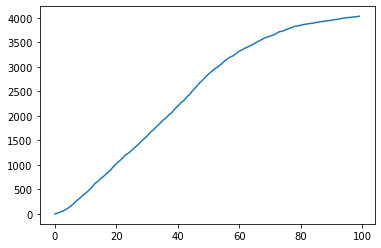

In [39]:
plt.plot( vocabsize)
plt.show()

In [40]:
print( vocabsize[0:16])

[0, 20, 42, 69, 108, 151, 204, 263, 316, 373, 424, 480, 540, 619, 666, 727]


In [13]:
print( vocabsize[0:16])

[0, 25, 47, 76, 116, 162, 216, 277, 333, 390, 447, 508, 572, 656, 706, 771]


In [22]:
print( count)

Counter({'O-O': 46505, 'Cf6': 31487, 'Cf3': 30623, 'd4': 29060, 'e4': 27191, 'Cc3': 25806, 'd5': 24317, 'c5': 23339, 'e5': 23222, 'c4': 21548, 'Cc6': 21248, 'e6': 18511, 'g6': 16342, 'd6': 16023, 'f4': 15765, 'b5': 14812, 'f5': 14631, 'Be7': 14387, 'a6': 14200, 'Be3': 13746, 'a4': 13279, 'b4': 13256, 'a5': 12998, 'Bd3': 12808, 'g3': 12639, 'cxd4': 12353, 'h6': 12058, 'Bg7': 12020, 'h4': 12015, 'h3': 11983, 'h5': 11787, 'g4': 11270, 'c6': 10935, 'Bg5': 10837, 'Dc7': 10593, 'Cxd4': 10584, 'g5': 10530, 'Be2': 10402, 'a3': 10335, 'Ce5': 10218, 'b6': 10145, 'c3': 9881, 'Te1': 9850, 'Bd7': 9794, 'b3': 9769, 'Cd7': 9693, 'Te8': 9647, 'Dd2': 9552, 'exd5': 9545, 'Ce4': 9405, 'Cd5': 9350, 'De2': 8820, 'f3': 8763, 'Tc8': 8574, 'e3': 8491, 'cxd5': 8468, 'Bg2': 8409, 'Be6': 8404, 'Bb7': 8269, 'f6': 8074, 'Rg7': 8032, 'Dc2': 8010, 'Tc1': 7572, 'Cd2': 7465, 'Bf4': 7395, 'De7': 7360, 'Cd4': 7290, 'Tb8': 7249, 'Bc4': 7219, 'Td1': 7183, 'dxe5': 7180, 'Bd6': 7077, 'Rg2': 7067, 'Bd2': 6988, 'Td8': 6979, '

In [41]:
print( len( flat_tokens))

2297914


In [42]:
sorted= builtins.sorted

In [43]:
counted= {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}

In [25]:
counted

{'O-O': 46505,
 'Cf6': 31487,
 'Cf3': 30623,
 'd4': 29060,
 'e4': 27191,
 'Cc3': 25806,
 'd5': 24317,
 'c5': 23339,
 'e5': 23222,
 'c4': 21548,
 'Cc6': 21248,
 'e6': 18511,
 'g6': 16342,
 'd6': 16023,
 'f4': 15765,
 'b5': 14812,
 'f5': 14631,
 'Be7': 14387,
 'a6': 14200,
 'Be3': 13746,
 'a4': 13279,
 'b4': 13256,
 'a5': 12998,
 'Bd3': 12808,
 'g3': 12639,
 'cxd4': 12353,
 'h6': 12058,
 'Bg7': 12020,
 'h4': 12015,
 'h3': 11983,
 'h5': 11787,
 'g4': 11270,
 'c6': 10935,
 'Bg5': 10837,
 'Dc7': 10593,
 'Cxd4': 10584,
 'g5': 10530,
 'Be2': 10402,
 'a3': 10335,
 'Ce5': 10218,
 'b6': 10145,
 'c3': 9881,
 'Te1': 9850,
 'Bd7': 9794,
 'b3': 9769,
 'Cd7': 9693,
 'Te8': 9647,
 'Dd2': 9552,
 'exd5': 9545,
 'Ce4': 9405,
 'Cd5': 9350,
 'De2': 8820,
 'f3': 8763,
 'Tc8': 8574,
 'e3': 8491,
 'cxd5': 8468,
 'Bg2': 8409,
 'Be6': 8404,
 'Bb7': 8269,
 'f6': 8074,
 'Rg7': 8032,
 'Dc2': 8010,
 'Tc1': 7572,
 'Cd2': 7465,
 'Bf4': 7395,
 'De7': 7360,
 'Cd4': 7290,
 'Tb8': 7249,
 'Bc4': 7219,
 'Td1': 7183,
 'dxe5

In [44]:
#
# conta ate 16
#
flat_tokens16 = [t for _list in lines for t in _list[0:16]]
print( 'len( flat)', len( flat_tokens16))
count16= Counter( flat_tokens16)
print( 'len( count16)', len( count16))
counted16= {k: v for k, v in sorted(count16.items(), key=lambda item: item[1], reverse=True)}
print( counted16)

len( flat) 473529
len( count16) 776
{'O-O': 25033, 'Cf6': 24489, 'Cf3': 24462, 'd4': 23906, 'e4': 19723, 'Cc3': 19474, 'd5': 15863, 'e6': 14668, 'Cc6': 14029, 'c5': 13768, 'c4': 13249, 'd6': 12986, 'e5': 11864, 'g6': 9536, 'Bg7': 8945, 'Be7': 7379, 'cxd4': 7311, 'c6': 6719, 'g3': 6466, 'Bg2': 6088, 'a6': 5914, 'e3': 5802, 'Cxd4': 5321, 'Bd3': 5155, 'c3': 4774, 'Bg5': 4571, 'Be2': 4566, 'exd5': 4202, 'Cbd7': 4052, 'd3': 3980, 'Be3': 3889, 'cxd5': 3577, 'Bc4': 3185, 'b6': 3055, 'b5': 2694, 'f4': 2540, 'Bg4': 2486, 'Bb4': 2484, 'h6': 2453, 'Bb7': 2449, 'h3': 2371, 'Bb5': 2360, 'a3': 2228, 'Cbd2': 2073, 'b3': 1878, 'Bf5': 1846, 'Bd6': 1832, 'Bf4': 1791, 'Bd7': 1789, 'Dc7': 1739, 'Cd7': 1671, 'Cxe4': 1664, 'f5': 1633, 'Dc2': 1621, 'dxc4': 1619, 'exd4': 1609, 'Dd2': 1584, 'Cxd5': 1574, 'Te1': 1485, 'dxe5': 1480, 'f3': 1442, 'Cd2': 1412, 'Bc5': 1404, 'a4': 1321, 'Bb2': 1300, 'dxe4': 1300, 'Db6': 1293, 'Bb3': 1261, 'Ce7': 1260, 'Bd2': 1229, 'Cge2': 1187, 'Cd5': 1149, 'Cge7': 1116, 'Ce4': 1106,

In [64]:
counted16_k= [k for k, v in sorted(count16.items(), key=lambda item: item[1], reverse=True)]
print( counted16_k)

['O-O', 'Cf6', 'Cf3', 'd4', 'e4', 'Cc3', 'd5', 'e6', 'Cc6', 'c5', 'c4', 'd6', 'e5', 'g6', 'Bg7', 'Be7', 'cxd4', 'c6', 'g3', 'Bg2', 'a6', 'e3', 'Cxd4', 'Bd3', 'c3', 'Bg5', 'Be2', 'exd5', 'Cbd7', 'd3', 'Be3', 'cxd5', 'Bc4', 'b6', 'b5', 'f4', 'Bg4', 'Bb4', 'h6', 'Bb7', 'h3', 'Bb5', 'a3', 'Cbd2', 'b3', 'Bf5', 'Bd6', 'Bf4', 'Bd7', 'Dc7', 'Cd7', 'Cxe4', 'f5', 'Dc2', 'dxc4', 'exd4', 'Dd2', 'Cxd5', 'Te1', 'dxe5', 'f3', 'Cd2', 'Bc5', 'a4', 'Bb2', 'dxe4', 'Db6', 'Bb3', 'Ce7', 'Bd2', 'Cge2', 'Cd5', 'Cge7', 'Ce4', 'De2', 'Be6', 'bxc3', 'Ce2', 'Dxd5', 'Da5', 'dxc5', 'Ba4', 'Ce5', 'a5', 'Cxe5', 'Bxf6', 'b4', 'Cxc3', 'Cb6', 'Bxc3+', 'Bxc4', 'Db3', 'Bxc6', 'Cb3', 'bxc6', 'Cfd7', 'De7', 'Bb4+', 'Te8', 'Dxd4', 'Ca6', 'h4', 'Bb5+', 'Bxf3', 'Bh4', 'f6', 'Cxc6', 'Cgf6', 'h5', 'Ca3', 'Cgf3', 'g4', 'O-O-O', 'Cd4', 'Bxc3', 'dxc6', 'Cg4', 'Bg6', 'Bxc5', 'Cg3', 'Bh5', 'Tb1', 'Cdb5', 'Cg5', 'Ch6', 'Df3', 'g5', 'Tb8', 'Ba6', 'Dd7', 'Cb5', 'Ca5', 'Bb6', 'cxb5', 'exf6', 'Tc1', 'Bxd3', 'Dg4', 'dxc3', 'exd6', 'Df6', 

In [47]:
#
# contar, mas removendo os simbolos
#
def cleanup(line):
    return re.sub('[^0-9a-zA-Z -]+', '', line).replace( 'x', '')

In [48]:
#
# conta ate 16
#
pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_pt.txt"
with open(pgnfile) as f:
    linesx = [ln.rstrip() for ln in f]
    
linesx= [re.sub("[\[].*?[\]]", "", ln) for ln in linesx]
linesx= [ln[8:] for ln in linesx]
linesx= [cleanup( ln) for ln in linesx]
linesx= [ln.split() for ln in linesx]

flat_tokens16x = [t for _list in linesx for t in _list[0:16]]
print( 'len( flat)', len( flat_tokens16x))
count16x= Counter( flat_tokens16x)
print( 'len( count16x)', len( count16x))
counted16x= {k: v for k, v in sorted(count16x.items(), key=lambda item: item[1], reverse=True)}
print( counted16x)


len( flat) 473527
len( count16x) 451
{'O-O': 25033, 'Cf6': 24902, 'Cf3': 24556, 'd4': 23906, 'Cc3': 20233, 'e4': 19723, 'd5': 15863, 'e6': 14669, 'Cc6': 14589, 'c5': 13768, 'c4': 13249, 'd6': 12986, 'e5': 11864, 'g6': 9536, 'Bg7': 8968, 'Be7': 7571, 'cd4': 7311, 'c6': 6719, 'g3': 6466, 'Bg2': 6117, 'a6': 5914, 'e3': 5802, 'Cd4': 5779, 'Bd3': 5411, 'c3': 4774, 'Be2': 4666, 'Bg5': 4610, 'ed5': 4202, 'Cbd7': 4082, 'd3': 3980, 'Be3': 3934, 'Bc4': 3917, 'cd5': 3577, 'Bb4': 3249, 'b6': 3055, 'Bb5': 3054, 'Ce4': 2772, 'Cd5': 2723, 'b5': 2694, 'f4': 2540, 'Bg4': 2496, 'Bb7': 2456, 'h6': 2453, 'h3': 2371, 'a3': 2228, 'Cbd2': 2136, 'Bd7': 2050, 'Bd6': 1992, 'Bf5': 1899, 'b3': 1879, 'Bf4': 1869, 'Bc5': 1810, 'Cd7': 1766, 'Ce5': 1744, 'Dc7': 1743, 'Dd2': 1710, 'f5': 1633, 'Dc2': 1624, 'dc4': 1619, 'ed4': 1609, 'Cd2': 1520, 'Te1': 1494, 'de5': 1480, 'Bd2': 1470, 'f3': 1442, 'Db6': 1349, 'a4': 1321, 'Bb2': 1312, 'de4': 1300, 'Ce7': 1279, 'Bb3': 1266, 'De2': 1211, 'Bc3': 1211, 'Cge2': 1188, 'Be6': 11

In [49]:
#pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_pt.txt"
#with open(pgnfile) as f:
#    linesx = [ln.rstrip() for ln in f]
    
#linesx= [re.sub("[\[].*?[\]]", "", ln) for ln in linesx]
#linesx= [ln[8:-1] for ln in linesx]
#linesx= [cleanup( ln) for ln in linesx]
#linesx= [ln.split() for ln in linesx]

flat_tokensx = [t for _list in linesx for t in _list]
print( 'len( flat)', len( flat_tokensx))
countx= Counter( flat_tokensx)
print( 'len( countx)', len( countx))
countedx= {k: v for k, v in sorted(countx.items(), key=lambda item: item[1], reverse=True)}
print( countedx)


len( flat) 2297911
len( countx) 1757
{'O-O': 46597, 'Cf6': 35092, 'Cf3': 32778, 'd4': 29221, 'Cc3': 28623, 'e4': 27444, 'd5': 24465, 'Cc6': 24258, 'c5': 23523, 'e5': 23466, 'c4': 21779, 'e6': 18696, 'Cd4': 18398, 'Ce5': 17255, 'Cd5': 16925, 'Ce4': 16719, 'g6': 16520, 'Be7': 16246, 'd6': 16187, 'f4': 16153, 'Be3': 15471, 'f5': 15029, 'b5': 14977, 'Bd3': 14743, 'a6': 14313, 'Bg7': 13736, 'b4': 13443, 'a4': 13439, 'a5': 13162, 'g3': 12824, 'Bg5': 12737, 'cd4': 12416, 'Te1': 12376, 'h6': 12304, 'h4': 12292, 'h3': 12163, 'Te8': 12138, 'h5': 12048, 'Dc7': 11758, 'g4': 11649, 'Be2': 11647, 'Cd7': 11370, 'Bd7': 11309, 'Bc4': 11285, 'Dd2': 11251, 'Tc8': 11132, 'c6': 11051, 'g5': 10880, 'Be6': 10676, 'Td8': 10635, 'Td1': 10544, 'a3': 10458, 'De2': 10435, 'Bf6': 10400, 'b6': 10267, 'Tc1': 10024, 'c3': 10005, 'Bf4': 9924, 'b3': 9909, 'Rg7': 9814, 'De7': 9689, 'Bg2': 9685, 'ed5': 9610, 'Bb7': 9274, 'Cc5': 9192, 'Bd6': 9192, 'Dc2': 9166, 'f3': 8996, 'Bf5': 8789, 'Bc5': 8714, 'Cd2': 8680, 'e3': 8652,

In [56]:
test_labels= "C:/mestrado/datasets/unified/parts/carnaval/fullpage/labels"
tfiles= glob( os.path.join( test_labels, "*.pgn"))

In [57]:
tlabels= []
for f in tfiles:
        tlabels.append( read_label( f))

In [59]:
ttokens= [lab.split() for lab in tlabels]

In [62]:
tflat_tokens = [t for _list in ttokens[0:16] for t in _list]

In [63]:
len( tflat_tokens)

1286

In [66]:
for t in tflat_tokens:
    if t not in counted16_k:
        print( t)

Nf3
Nxd4
Qc7
Nc3
Nf6
Qd2
Nxe4
Qc2
Nxc3
Kxf8
Qd2
Qe5+
Kg7
Nc6
Qf6
Nb3
Nc5
Na5
Rab1
Rad8
Ne4
Qe7
Qxe4
Qxa5
Rxd5
Qxa6
Kxf2
Qxb1
Qa3
Qf5
Qc3+
Qf6
Qb4
Qd4+
Qxd4+
Rxd4
Ke3
Ra4
Kd3
Kf6
Kc3
Nf3
Nxd7
Ngf6
Nbd2
Nf1
Ng3
Qc7
Nf5
Nf8
Qb3
Ne6
Ng5
Nxg5
Nh6+
Kg7
Nd5
Nxe3
Qxf7+
Kxh6
Qd7
Qf8+
Kg5
Qf6+
Kh5
g4+
Kh6
Qf8+
Kg5
Qf7
Qf6+
Kh6
Kg2
Qh4#
Nf3
Nf6
Nbd7
Nbd2
Nf8
Ng6
Rc2
Qa1
Qb6
Nxe4
Nxe4
Qc7
Rcd8
Rcd2
Rxd2
Rxd2
Qd1
Rxd2
Qxd2
Kf1
Qd7
Qxd7
Ke2
Nd4
Kf7
Ne7
Nc3
Nc6
Nf3
Nge7
Ne1
Nc2
Nxd5
Ne3
Nde7
Nc4
Nd4
Ndc6
Nb5
Nd5
Nxe5
Nxe5
Ne3
Nxf7
Qc1
Kh7
Qb2
Nxf1
Qg5
Nd6
Qc1
Qxc1
Rxc1
Nc4
Kf2
Kg7
Kf6
Rh4
Kg5
Rb3
Kg2
Rd4
Rh4
Kf4
e3+
Kg5
Kf4
gxf5+
Kf1
Rg3
Rxb6
Ra3
Kg3
Rg6+
Kf3
Bc6+
Ke3
Re6+
Kd3
f2
Rd1+
Kc2
Rxd4
Nf6
Qb6
Qb3
Qc2
Nd2
Nc6
Ngf3
Nd7
Ng5
Ne7
Rxf6
Nf5
Nf6
Nf1
Ng3
Ne4
Qa6
N3xe4
Rdg1
Rf6
Rg3
Rg6
Rhg1
Qf6
Nh3
Rxh6
Kh8
Qd2
Ng5
Nh3
Rxh3
Qg5
Rfh1
Qxd2+
Kxd2
Rg2
Rxh5+
Kg7
Ke3
Rh7+
Kf6
Rxb7
Rg6
Rhh7
Ra7
Kg5
Rhb7
Rf6
Rxa5
--
Ke2
Kg4
Rg7+
Kh5
Raa7
Rdf8
Rg2
Kh6
Rag7
Rxf2+
Kxg7
Rg2+
Kh6
Rh2+
Kg6
Nf3
Nc3
Nc6
Nf6
Nxd4
Nxd4

In [85]:
def _find():
    
    pgnfile= "C:/mestrado/datasets/jogos/pgn_30k_eng.txt"
    with open(pgnfile) as f:
        lines = [line.rstrip() for line in f]
    lines= [re.sub("[\[].*?[\]]", "", ln) for ln in lines]
    lines= [ln[8:] for ln in lines]
    lines= [ln.split() for ln in lines]
    flat_tokens16 = [t for _list in lines for t in _list[0:16]]
    count16= Counter( flat_tokens16)
    counted16_k= [k for k, v in sorted(count16.items(), key=lambda item: item[1], reverse=True)]
    
    test_labels= "C:/mestrado/datasets/unified/parts/carnaval/fullpage/labels"
    tfiles= glob( os.path.join( test_labels, "*.pgn"))
    tlabels= []
    for f in tfiles:
            tlabels.append( read_label( f))
    ttokens= [lab.split() for lab in tlabels]
#     for tt in ttokens:
#         print( tt[0:1])    
#     print( [t for _list in ttokens for t in _list[0:1]])
    
    tflat_tokens = [t for _list in ttokens for t in _list[0:20]]
    for t in tflat_tokens:
#         print( t)
        if t not in counted16_k:
            print( t)
        
_find()

Rfc8
Rxf6
Ncb5
Kf6


In [86]:
print( len( counted16_k))

776
